In [1]:
# Data import
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('candy_data.csv', index_col = 'competitorname')
print(df.dtypes)
print(df.head(10))

chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object
                    chocolate  fruity  caramel  peanutyalmondy  nougat  \
competitorname                                                           
100 Grand                   1       0        1               0       0   
3 Musketeers                1       0        0               0       1   
One dime                    0       0        0               0       0   
One quarter                 0       0        0               0       0   
Air Heads                   0       1        0               0       0   
Almond Joy                  1       0        0               1       0   
Baby Ruth                   1       0        1            

In [2]:
# Data cleaning
df.drop(['One dime', 'One quarter'], inplace = True)
df

chocolate  fruity  caramel  peanutyalmondy  \
competitorname                                                           
100 Grand                           1       0        1               0   
3 Musketeers                        1       0        0               0   
Air Heads                           0       1        0               0   
Almond Joy                          1       0        0               1   
Baby Ruth                           1       0        1               1   
...                               ...     ...      ...             ...   
Twizzlers                           0       1        0               0   
Warheads                            0       1        0               0   
Welch's Fruit Snacks                0       1        0               0   
Werther's Original Caramel          0       0        1               0   
Whoppers                            1       0        0               0   

                            nougat  crispedricewafer  hard  bar  pluribus  \
competitorname                                                              
100 Grand                        0                 1     0    1         0   
3 Musketeers                     1                 0     0    1         0   
Air Heads                        0                 0     0    0         0   
Almond Joy                       0                 0     0    1         0   
Baby Ruth                        1                 0     0    1         0   
...                            ...               ...   ...  ...       ...   
Twizzlers                        0                 0     0    0         0   
Warheads                         0                 0     1    0         0   
Welch's Fruit Snacks             0                 0     0    0         1   
Werther's Original Caramel       0                 0     1    0         0   
Whoppers                         0                 1     0    0         1   

                            sugarpercent  pricepercent  winpercent  
competitorname                                                      
100 Grand                          0.732         0.860   66.971725  
3 Musketeers                       0.604         0.511   67.602936  
Air Heads                          0.906         0.511   52.341465  
Almond Joy                         0.465         0.767   50.347546  
Baby Ruth                          0.604         0.767   56.914547  
...                                  ...           ...         ...  
Twizzlers                          0.220         0.116   45.466282  
Warheads                           0.093         0.116   39.011898  
Welch's Fruit Snacks               0.313         0.313   44.375519  
Werther's Original Caramel         0.186         0.267   41.904308  
Whoppers                           0.872         0.848   49.524113  

[83 rows x 12 columns]

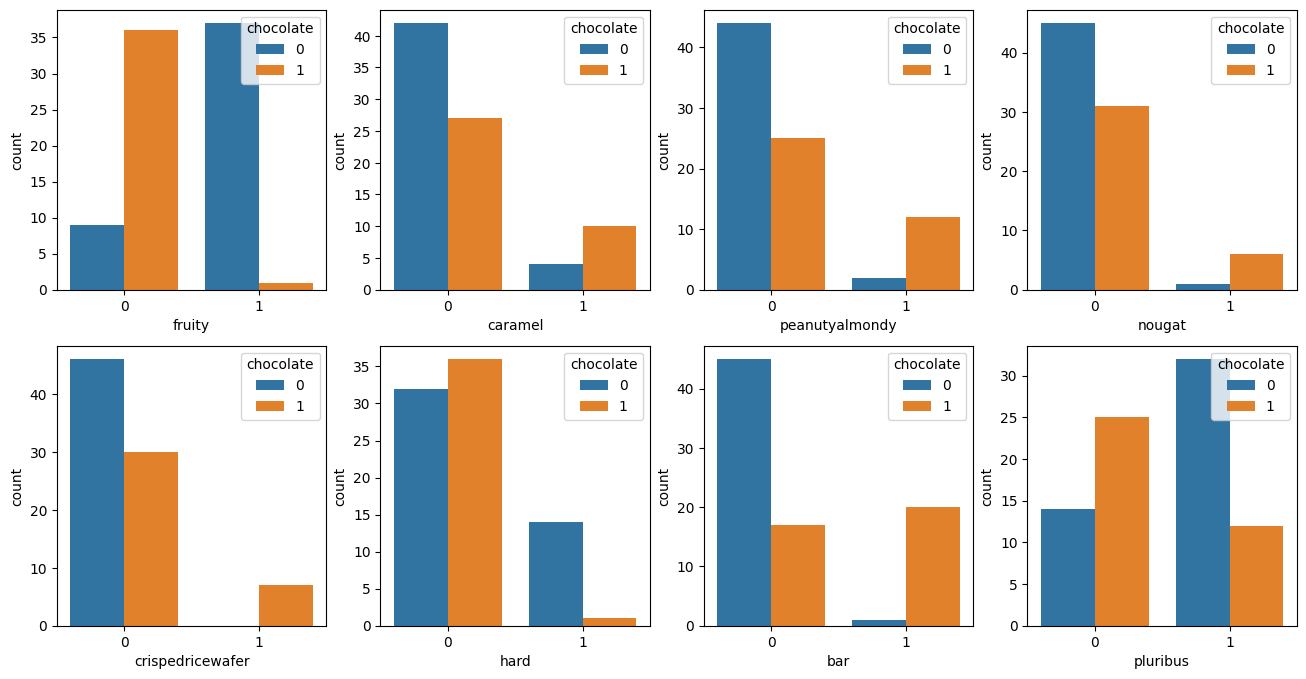

In [3]:
import seaborn as sns
cat_list=['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']
fig=plt.figure(figsize=(16,8))
for i in range(len(cat_list)):
    column=cat_list[i]
    sub=fig.add_subplot(2,4,i+1)
    chart=sns.countplot(x=column, hue='chocolate', data=df)

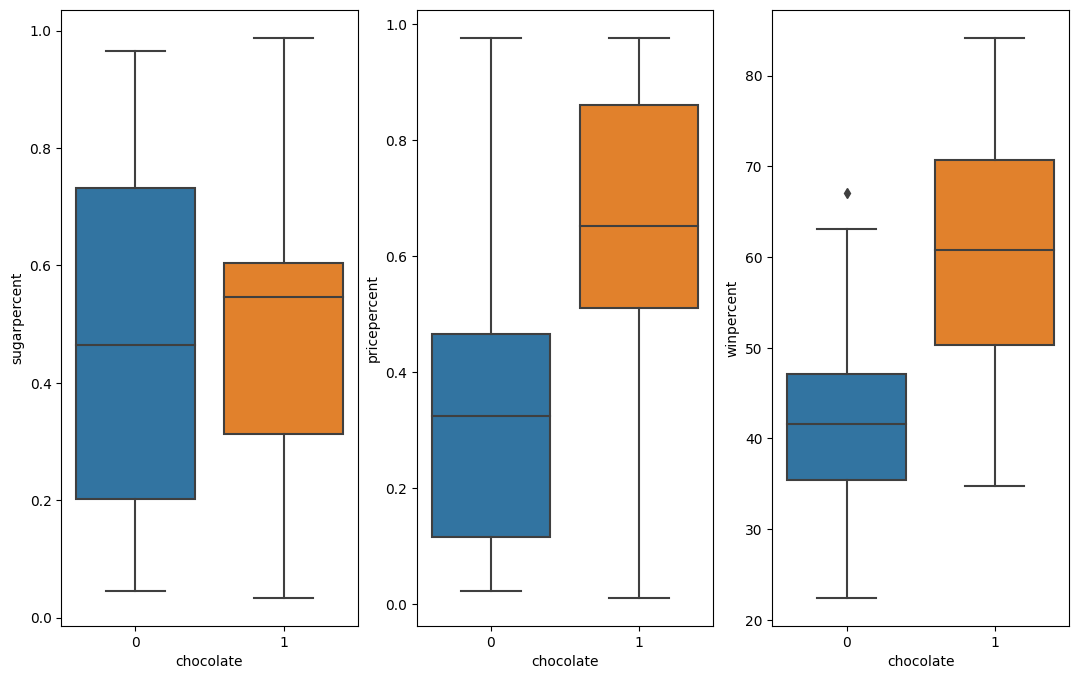

In [4]:
import seaborn as sns
num_list=['sugarpercent', 'pricepercent', 'winpercent']
fig=plt.figure(figsize=(13, 8))

for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(1,3,i+1)
    sns.boxplot(x='chocolate',y=column, data=df)

In [5]:
# Feature Engineering
from sklearn.feature_selection import SelectKBest, f_classif, chi2

print(df.corr())

x = df.loc[:, ['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']]
y = df.loc[:, 'chocolate']

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x, y)
print(catFeatures.scores_)
np.set_printoptions(suppress = True)
print(catFeatures.pvalues_)

                  chocolate    fruity   caramel  peanutyalmondy    nougat  \
chocolate          1.000000 -0.775500  0.243325        0.372786  0.251167   
fruity            -0.775500  1.000000 -0.349349       -0.413928 -0.278887   
caramel            0.243325 -0.349349  1.000000        0.054865  0.326416   
peanutyalmondy     0.372786 -0.413928  0.054865        1.000000  0.210636   
nougat             0.251167 -0.278887  0.326416        0.210636  1.000000   
crispedricewafer   0.338392 -0.278887  0.210636       -0.020924 -0.092105   
hard              -0.358230  0.385407 -0.127943       -0.211559 -0.142539   
bar                0.593165 -0.534810  0.329919        0.255910  0.521469   
pluribus          -0.369810  0.283713 -0.285049       -0.220583 -0.322356   
sugarpercent       0.072069 -0.073631  0.211804        0.072723  0.115097   
pricepercent       0.502438 -0.451413  0.251414        0.306888  0.150817   
winpercent         0.632373 -0.405264  0.207772        0.402892  0.195987   

In [6]:
x = df.loc[:, ['sugarpercent', 'pricepercent', 'winpercent']]
y = df.loc[:, 'chocolate']

fs = SelectKBest(score_func=f_classif, k='all')
bestFeatures = fs.fit(x, y)
np.set_printoptions(suppress = True)
print(bestFeatures.scores_) 
print(bestFeatures.pvalues_)

df.drop(['sugarpercent'], axis = 1, inplace = True)


[ 0.42290177 27.35305514 53.97664807]
[0.51733295 0.0000013  0.        ]


chocolate
0    46
1    37
Name: count, dtype: int64
0.8
0.7058823529411764


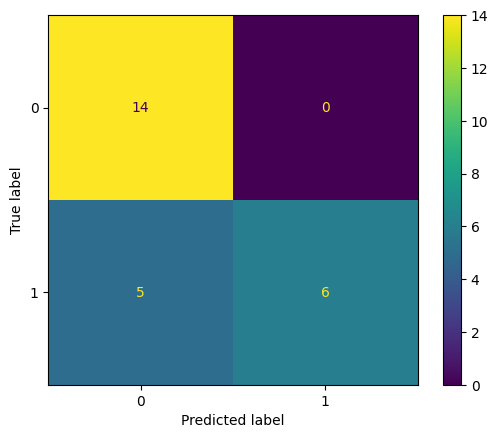

In [7]:
# Prediction model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

print(df['chocolate'].value_counts())

x = df.loc[:, df.columns != 'chocolate']
y = df['chocolate']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, stratify = y)   

svc = SVC(kernel='linear', C=0.025, random_state = 101)
svc.fit(x_train, y_train)
test_pred1 = svc.predict(x_test)
print(accuracy_score(y_test, test_pred1))
print(f1_score(y_test, test_pred1))

ConfusionMatrixDisplay.from_estimator(svc, x_test, y_test)



0.84
0.7999999999999999


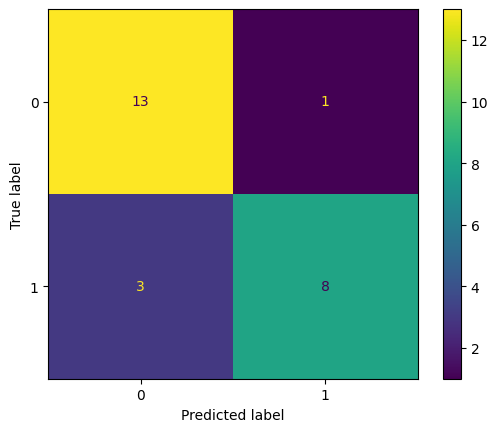

In [8]:
LogRegression = LogisticRegression(penalty = None, max_iter = 2000)
LogRegression.fit(x_train, y_train.values.ravel())
test_pred2 = LogRegression.predict(x_test)
print(accuracy_score(y_test, test_pred2))
print(f1_score(y_test, test_pred2))

ConfusionMatrixDisplay.from_estimator(LogRegression, x_test, y_test)

In [10]:
import pickle
pickle.dump(LogRegression, open("model.pkl", "wb"))  



In [11]:
Fruity = 0
Caramel = 0
PeanutyAlmondy = 0
Nougat = 1
CrispedRiceWafer = 0
Hard = 0
Bar = 1
Pluribus = 0
PricePercent = 0.511
WinPercent = 67.602936

Log_model = pickle.load(open('model.pkl', "rb"))
result = Log_model.predict([[Fruity, Caramel, PeanutyAlmondy, Nougat, CrispedRiceWafer, Hard, Bar, Pluribus, PricePercent, WinPercent]])
prob = Log_model.predict_proba([[Fruity, Caramel, PeanutyAlmondy, Nougat, CrispedRiceWafer, Hard, Bar, Pluribus, PricePercent, WinPercent]])
print(result)
print(prob)


[1]
[[0. 1.]]


C:\Users\ellis\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\ellis\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
